In [171]:
!pip3 install image

import ResultsInspectors.ga_inspector as gai
import ResultsInspectors.bo_inspector as boi
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import image

from IPython import display
import pylab as pl
import numpy as np
import pandas as pd
import os

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind_from_stats
from statistics import mean
from statistics import stdev
import ast
from collections import defaultdict

accuracies = dict()
testbed = 'Testbed1/'
results_directory = 'Final Results (Random Initial State)/' + testbed



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip


In [172]:
def GA_Plotter(directory_name, linestyle = '-', color = 'k', plotDataPoints = True, fontsize = 10):
    maxs = []
    D = [0]*1000
    average_sens = 0
    results = gai.read_files(results_directory + directory_name)
    accuracies[directory_name] = []
    
    for run in results:
        run = run[0]

        data = []
        sensor_num = []
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        average_sens = average_sens + int(sensor_num[data.index(max(data))])                
        accuracies[directory_name].append(max(data))

        data = list(data)
        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        
        maxs.append(max(data))

        D = [d1 + d2 for d1, d2 in zip(D,data)]

    D = [d / len(results) for d in D]
    gai.plot_convergence(D, 
                         plotDataPoints = False, 
                         color = color, 
                         ls = linestyle, 
                         xlabel="Black-box function query #",
                         ylabel='$F^1$'
                         + '\nnumber of motion sensors placed: ' + str(average_sens / 5),
                         fontsize = fontsize)
    
    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))

    
def GA_Plotter_single(directory_name, linestyle = '-', color = 'k', plotDataPoints = True, fontsize = 10):
    results = gai.read_files(results_directory + directory_name)
    average_sens = 0
    maxs = []
    
    for run in results:
        run = run[0]
        data = []
        sensor_num = []
        
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        maxs.append(data)
                
        # average_sens = average_sens + int(sensor_num[data.index(max(data))])  
        
    run = results[maxs.index(max(maxs))]
    run = run[0]
    
    data = []
    sensor_num = []

    for generation in run:
        for chromosome in generation:
            data.append(chromosome[0])
    
    
    gai.plot_convergence(data, 
                         plotDataPoints = plotDataPoints, 
                         color = color, 
                         ls = linestyle, 
                         xlabel="Black-box function query #",
                         ylabel='$F^1$',
                         fontsize = fontsize)
                         # name = '\nnumber of motion sensors placed: ' + str(average_sens / 5))
            
    print(average_sens / 5)
    return data

In [197]:

def BO_Plotter(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints, fontsize):
    results = boi.read_files(results_directory + directory_name)
        
    accuracies[directory_name] = []
    
    for index, result in enumerate(results):
        data = [100 - p for p in result.perfs]

        import pickle
        with open(results_directory + directory_name + '/' + str(index), "wb") as fp:
            pickle.dump(data, fp)

'''
def BO_Plotter(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints, fontsize):
    maxs = []
    test = []
    D = [0]*1000
    
    results = boi.read_files(results_directory + directory_name)        
    accuracies[directory_name] = []

    for index, result in enumerate(results):
        
        try:
            data = [100 - p for p in result.perfs]

        except:
            data = result

        accuracies[directory_name].append(max(data))

        if 'DGBO' in directory_name:
            print('DGBO max(data): ', max(data))


        maxs.append(max(data))
        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        D = [d1 + d2 for d1, d2 in zip(D,data)]
    
        if not holdplot:
            plt.show()
            
        D = [d / len(results) for d in D]

    print("###########")
    plt.plot(D)  

    ax1 = boi.plot_convergence(D, 
                               plotDataPoints = False, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$',
                               fontsize = fontsize
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )

    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))
    
    return ax1, sum(maxs) / 5
'''
    
def BO_Plotter_best(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints, fontsize):
    results = boi.read_files(results_directory + directory_name)
    # accuracies[directory_name] = []
    maxs = []
    
    for index, result in enumerate(results):
        data = [100 - p for p in result.perfs]
        maxs.append(max(data))

    best_result = results[maxs.index(max(maxs))]
    data = [100 - p for p in best_result.perfs]


    ax1 = boi.plot_convergence(data, 
                               plotDataPoints = plotDataPoints, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$',
                               fontsize = fontsize
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )


    if not holdplot:
        plt.show()

    return data
    # return ax1, ax2, sum(maxs) / 5

In [198]:
def Greedy_Plotter(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints, data_range, fontsize):
    maxs = []
    # test = []
    D = [0]*1000
    # results = boi.read_files(results_directory + directory_name)
    
    average_sens = 0
    results = gai.read_files(results_directory + directory_name)
    
    accuracies[directory_name] = []
    
    for run in results:
        run = run[0]

        data = []
        sensor_num = []
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        average_sens = average_sens + int(sensor_num[data.index(max(data))])                
        # accuracies[directory_name].append(max(data))

        data = list(data)
        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        


        maxs.append(max(data[0:data_range]))
        accuracies[directory_name].append(max(data[0:data_range]))

        D = [d1 + d2 for d1, d2 in zip(D,data)]

    D = [d / len(results) for d in D]
    D = D[0:data_range]
    
    if len(D) < 1000:
        for i in range(data_range, 1000):
            D.append(D[data_range-1])
        
    

    ax1 = gai.plot_convergence(D, 
                               plotDataPoints = False, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$',
                               fontsize = fontsize
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )
    
    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))
    return ax1, sum(maxs) / len(results)
    
    
def Greedy_Plotter_single(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints, data_range, fontsize):
    results = gai.read_files(results_directory + directory_name)
    average_sens = 0
    maxs = []
    
    for run in results:
        run = run[0]
        data = []
        sensor_num = []
        

        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])
                
        maxs.append(max(data[0:data_range]))  
        # average_sens = average_sens + int(sensor_num[data.index(max(data))])      
    run = results[maxs.index(max(maxs))]
    print(max(maxs))
    
    run = run[0]
    
    data = []
    sensor_num = []

    for generation in run:
        for chromosome in generation:
            data.append(chromosome[0])
        
    data = data[0:data_range]
    
    if len(data) < 1000:
        for i in range(data_range, 1000):
            data.append(data[data_range-1])
        
    gai.plot_convergence(data, 
                         plotDataPoints = plotDataPoints, 
                         color = color, 
                         ls = linestyle, 
                         xlabel="Black-box function query #",
                         ylabel='$F^1$',
                         fontsize = fontsize)
                         # name = '\nnumber of motion sensors placed: ' + str(average_sens / 5))
            
    print(average_sens / len(results))

    return data

	GA (0.25)performance: 56.78470462499016 $\pm$ 1.0321128477426669
BO (5-0.25)
-----  Incompatible checksums (0x37cdaa4 vs (0xea77850, 0xba75644, 0xa1bae31) = (_choices_set, choices, choices_vector, default_value, meta, name, normalized_default_value, num_choices, probabilities, weights))
DGBO (5-0.25)
DGBO max(data):  68.43696373090056
______
	DGBO (5-0.25)performance: 68.43696373090056 $\pm$ 0.0
BO (7-0.25)
-----  Incompatible checksums (0x37cdaa4 vs (0xea77850, 0xba75644, 0xa1bae31) = (_choices_set, choices, choices_vector, default_value, meta, name, normalized_default_value, num_choices, probabilities, weights))
DGBO (7-0.25)
-----  [Errno 2] No such file or directory: 'Final Results (Random Initial State)/Testbed1/DGBO (7-0.25)'
BO (9-0.25)
-----  Incompatible checksums (0x37cdaa4 vs (0xea77850, 0xba75644, 0xa1bae31) = (_choices_set, choices, choices_vector, default_value, meta, name, normalized_default_value, num_choices, probabilities, weights))
DGBO (9-0.25)
-----  [Errno 2] No 

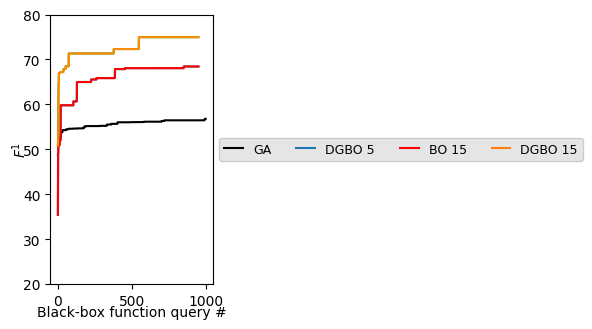

	GA (0.5)performance: 59.7206729767373 $\pm$ 0.4316534754756733
BO (5-0.5)
______
	BO (5-0.5)performance: 72.4758168336011 $\pm$ 1.0895635580188985
DGBO (5-0.5)
DGBO max(data):  67.01095794863592
DGBO max(data):  65.75102347308552
______
	DGBO (5-0.5)performance: 66.38099071086071 $\pm$ 0.6299672377751975
BO (7-0.5)
______
	BO (7-0.5)performance: 76.57565137645507 $\pm$ 1.9363906448037151
DGBO (7-0.5)
DGBO max(data):  74.19833004768736
DGBO max(data):  72.45972387935221
______
	DGBO (7-0.5)performance: 73.3290269635198 $\pm$ 0.8693030841675764
BO (9-0.5)
______
	BO (9-0.5)performance: 73.45257396655435 $\pm$ 1.6152255725871585
DGBO (9-0.5)
DGBO max(data):  73.85617507007713
DGBO max(data):  74.36299936640323
______
	DGBO (9-0.5)performance: 74.10958721824018 $\pm$ 0.2534121481630507
BO (11-0.5)
______
	BO (11-0.5)performance: 74.17916578566698 $\pm$ 1.5998994097247563
DGBO (11-0.5)
DGBO max(data):  71.38163659026469
DGBO max(data):  75.54932639030235
______
	DGBO (11-0.5)performance: 7

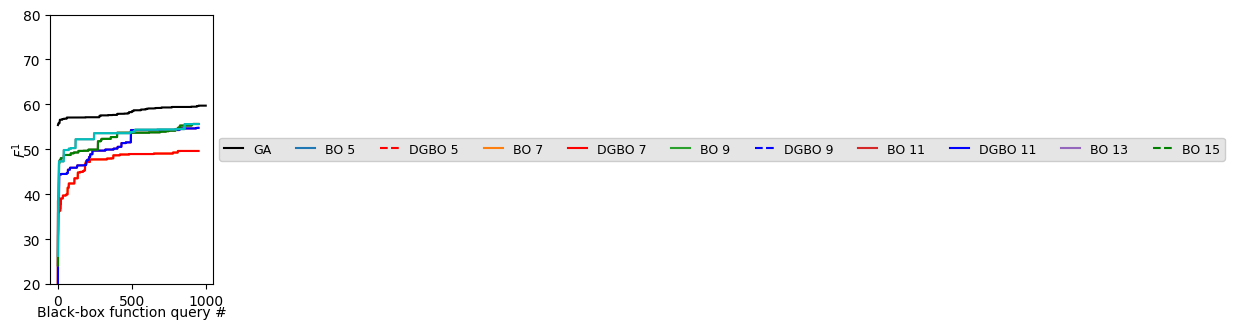

	GA (1)performance: 54.544862409712735 $\pm$ 1.032019811365162
BO (5-1)
______
	BO (5-1)performance: 68.48702164207734 $\pm$ 4.420616144068898
DGBO (5-1)
DGBO max(data):  71.42927411076494
DGBO max(data):  72.47440672071075
DGBO max(data):  70.62275556845134
DGBO max(data):  70.53940575369226
DGBO max(data):  71.94815279145945
______
	DGBO (5-1)performance: 71.40279898901575 $\pm$ 0.7483809790886073
BO (7-1)
______
	BO (7-1)performance: 72.88518321376532 $\pm$ 1.2770574782293624
DGBO (7-1)
DGBO max(data):  78.05546671124198
DGBO max(data):  75.41034868212184
DGBO max(data):  76.87947499419346
DGBO max(data):  77.15654312863707
DGBO max(data):  76.75979403741576
______
	DGBO (7-1)performance: 76.85232551072201 $\pm$ 0.8519029815258716
BO (9-1)
______
	BO (9-1)performance: 75.3058874435803 $\pm$ 1.180031346371763
DGBO (9-1)
DGBO max(data):  73.39261634561967
DGBO max(data):  79.60995236665116
DGBO max(data):  74.96513614342048
DGBO max(data):  78.41133427424089
______
	DGBO (9-1)performa

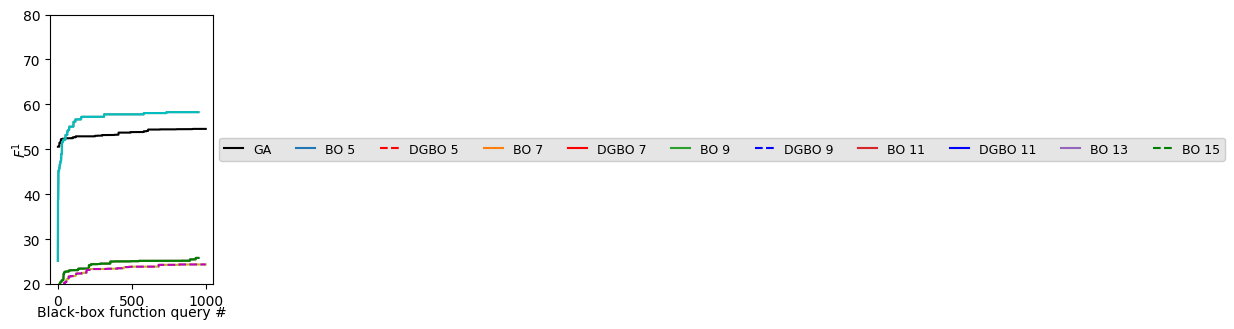

In [199]:
def calculate_datarange(e, gsn):
    if testbed == 'Testbed1/':
        placeHolders = []
        Xs = frange(e, 8, e)
        Ys = frange(e, 8, e)

        for x in Xs:
            for y in Ys:
                placeHolders.append([x, y])

    elif testbed == 'Testbed2/':
        placeHolders = []
        Xs = frange(e, 8, e)
        Ys = frange(e, 5.3, e)

        for x in Xs:
            for y in Ys:
                if x < 2 and y < 2:
                    continue
                else:
                    placeHolders.append([x, y])

    S = len(placeHolders)
    
    if gsn != -1:
        placed_sn = min(S, gsn)
    else:
        placed_sn = S
    print('places:', placed_sn)   
    dr = int((S * placed_sn) - ((placed_sn * (placed_sn + 1)) / 2))
    dr = min(dr, 1000)

    
    print(dr)
    return dr 


def frange(start, stop, step):
        steps = []
        while start < stop:
            steps.append(start)
            start +=step
        
        return steps

sensorNums = [5, 7, 9, 11, 13, 15]
epsilons = [0.25, 0.5, 1]

styles = [['', '--'],
           ['', ':'],
           ['', '-.'],
           ['o', '--'], 
           ['o', ':'],
           ['o', '-.']]
        
colors = ['r', 'b', 'g', 'c', 'm', 'darkorange']

for e in epsilons:
    index = 0
    BOnames = ['GA']
    fig, ax = plt.subplots(figsize=(2.1, 3.5))
    ax.set_ylim([20, 80])
    dn1 = 'GA (' + str(e) + ')'
    GA_Plotter(dn1, 
               linestyle = '-', 
               color = 'k',
               plotDataPoints = True,
               fontsize = 10)
    
    for index, sn in enumerate(sensorNums):
        dn2 = 'BO (' + str(sn) + '-' + str(e) + ')'
        dn3 = 'G (' + str(sn) + '-' + str(e) + ')'
        dn4 = 'DGBO (' + str(sn) + '-' + str(e) + ')'
        
        try:
            print(dn2)
            BO_Plotter(dn2, 
                        holdplot = True, 
                        plotDataPoints = False,
                        name = dn2, 
                        e = e,
                        linestyle = styles[0][1], 
                        marker = styles[0][0],
                        fontsize = 10,
                        color = colors[index])

            BOnames.append('BO ' + str(sn))
        except Exception as err:
            print('----- ', err)
        
        
        try:
            print(dn4)
            BO_Plotter(dn4, 
                        holdplot = True, 
                        plotDataPoints = False,
                        name = dn4, 
                        e = e,
                        linestyle = '-', 
                        marker = '',
                        fontsize = 10,
                        color = colors[index])

            BOnames.append('DGBO ' + str(sn))
        except Exception as err:
            print('----- ', err)
        
        '''
        dr = calculate_datarange(e, sn)
        
        try:
            Greedy_Plotter(dn3,
                        holdplot = True, 
                        plotDataPoints = False,
                        name = dn2, 
                        e = e,
                        linestyle = '-', 
                        marker = styles[0][0],
                        color = colors[index],
                        fontsize = 10,
                        data_range = dr)

            BOnames.append('Greedy ' + str(sn))

        except Exception as err:
            print('-----',  err)
        '''
        legend = plt.legend(BOnames, ncol=13, prop={'size': 9}, loc = 'center left', handlelength = 1.5, bbox_to_anchor=(1, 0.5))
        legend.get_frame().set_alpha(None)
        legend.get_frame().set_facecolor((0, 0, 0, 0.1))
    
    plt.grid()
    plt.show()

In [188]:
A = [1, 2]

In [190]:
type(A) != list

False

0.0
GA is less than 98.8 of the BOs observations.


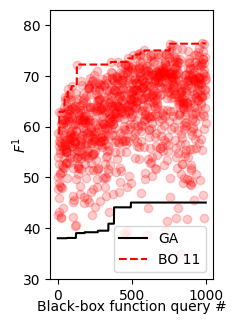

0.0
places: 7
959
63.832060585494865
0.0
GA is less than 99.8 of the BOs observations.
Greedy is less than 51.800000000000004 of the BOs observations.


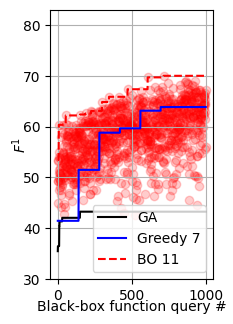

0.0
places: 11
308
66.01253453795086
0.0
GA is less than 99.8 of the BOs observations.
Greedy is less than 14.299999999999999 of the BOs observations.


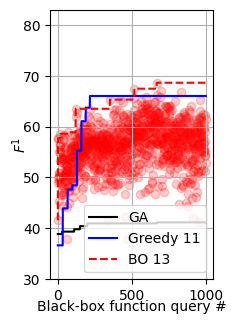

In [6]:
def calculate_moving_percentile(bo, baseline):
    counter = 0

    for index in range(len(bo)):
        if index == 0:
            if bo[index] > np.max(baseline[index]):
                counter += 1
            
        else:
            if bo[index] > np.max(baseline[0:index]):
                counter += 1

    
    return 100 * (counter / len(bo))


sensorNums = [5, 7, 9, 11, 13, 15]
epsilons = [0.25, 0.5, 1]

styles = [['', '--'],
           ['', ':'],
           ['', '-.'],
           ['o', '--'], 
           ['o', ':'],
           ['o', '-.']]
        
colors = ['r', 'b', 'g', 'c', 'm', 'darkorange']

for e in epsilons:
    if testbed == 'Testbed1/':
        if e == 0.25: 
            sn = 9
            gsn = -1
            
        elif e == 0.5:
            sn = 7
            gsn = -1
            
        elif e == 1:
            sn = 9
            gsn = 15
    elif testbed == 'Testbed2/':
        if e == 0.25: 
            sn = 11
            gsn = -1
            
        elif e == 0.5:
            sn = 11
            gsn = 7
            
        elif e == 1:
            sn = 13
            gsn = 11

    BOnames = ['GA']
    fig, ax = plt.subplots(figsize=(2.1, 3.5))
    ax.set_ylim([30, 83])
    plt.grid()
    
    dn1 = 'GA (' + str(e) + ')'
    ga_data = GA_Plotter_single(dn1, 
               plotDataPoints = False,
               linestyle = '-', 
               color = 'k',
               fontsize = 10,)
    
    
    dn2 = 'BO (' + str(sn) + '-' + str(e) + ')'
    
    if gsn != -1:
        dn3 = 'G (' + str(gsn) + '-' + str(e) + ')'
        
        dr = calculate_datarange(e, gsn)
        
        greedy_data = Greedy_Plotter_single(dn3, 
                holdplot = True, 
                plotDataPoints = False,
                name = dn3, 
                e = e,
                linestyle = '-', 
                marker = styles[0][0],
                color = 'b',
                data_range = dr,
                fontsize = 10)
    
    
    bo_data = BO_Plotter_best(dn2, 
            holdplot = True, 
            plotDataPoints = True,
            name = dn2, 
            e = e,
            linestyle = styles[0][1], 
            marker = styles[0][0],
            fontsize = 10,
            color = 'r')

    BOnames.append('BO ' + str(sn))

    from scipy import stats 

    
    print('GA is less than {} of the BOs observations.'.format(calculate_moving_percentile(bo_data, ga_data)))

    if gsn != -1:
        print('Greedy is less than {} of the BOs observations.'.format(calculate_moving_percentile(bo_data, greedy_data)))
        
    
        

    if gsn == -1:
        legend = plt.legend(['GA', 'BO ' + str(sn)],ncol=1, prop={'size': 10}, loc = 'lower right')
    else:
        legend = plt.legend(['GA', 'Greedy ' + str(gsn), 'BO ' + str(sn)],ncol=1, prop={'size': 10}, loc = 'lower right')
    
    # legend.get_frame().set_alpha(None)
    
    
    # legend.get_frame().set_facecolor((0, 0, 0, 0.1))
    
    # plt.grid()

    plt.show()
        



# Sensor Locations Animation

In [7]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    
    def f(x):
        return np.clip(x**2,-1,1)
        # return x**2
    
    #mycmap._lut[:,-1] = np.linspace(0.7, 1, N+4)
    # mycmap._lut[:,-1] = np.logspace(0.0, 10, N+4, endpoint=False, base = np.e)

    
    mycmap._lut[:,-1] = np.linspace(0, 1, N + 4, endpoint=False)
    
    # mycmap._lut[:,-1] = np.linalg.norm(mycmap._lut[:,-1])
    # print(type(mycmap._lut[:,-1]))
    return mycmap


def HeatMap(data_x, data_y):
    mycmap = transparent_cmap(plt.cm.autumn)    
    heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=100)
    extent = [0.2, 7.7, 0.6, 7.8]
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
    # heatmap = heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=[np.arange(0,400,5),np.arange(0,300,5)])
    # extent = [0.3, 8.2, 0.3, 8.2]
    # plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
def HM(x1, x2):
  mycmap = transparent_cmap(plt.cm.autumn) 
  if testbed == 'Testbed1/':
    extent = [0.0, 8.0, 0.4, 8.0]

  elif testbed == 'Testbed2/':
    extent = [0.0, 5.2, 0.4, 8.0]

  from scipy.stats import gaussian_kde
  # plt.figure(figsize=(8, 10))

  # fit an array of size [Ndim, Nsamples]
  data = np.vstack([x1, x2])
  kde = gaussian_kde(data)

  # evaluate on a regular grid
  xgrid = np.linspace(min(x1), max(x1), 50);
  ygrid = np.linspace(min(x2), max(x2), 50);
  Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
  Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

  # Plot the result as an image
  plt.imshow(Z.reshape(Xgrid.shape),
            origin='lower', aspect='auto',
            extent=extent,
            cmap = mycmap)
  # cb = plt.colorbar()
  # cb.set_label("Occupants presence probability")

def get_sensor_locations(c, epsilon):
    import ast

    # THIS IS FOR (X, Y) CONFIGURATION SPACES
    coordinates = c.get_dictionary()
    
    Xs = []
    Ys = []
    Ts = []

    
    try:
        for i in range(1, int(len(coordinates.keys())/2) + 1):
            Xs.append(coordinates['x'+str(i)] * epsilon)
            Ys.append(coordinates['y'+str(i)] * epsilon)
        
    except:
        for key in coordinates.keys():
            # print(coordinates[key])
            try:
                loc = ast.literal_eval(coordinates[key])
                Xs.append(loc[0])
                Ys.append(loc[1])

                #TODO: Handle different sensor types here:
                Ts.append(1)
                
            except:
                continue


    for k in range(len(Xs)):
        for i in range(len(Xs)):
            for j in range(i+1, len(Xs)):
                if Xs[i] == Xs[j] and Ys[i] == Ys[j]:
                    Xs[i] -= 0.2
                    # print(Xs[i])

    for k in range(len(Xs)):
        for i in range(len(Xs)):
            for j in range(i+1, len(Xs)):
                if Xs[i] == Xs[j] and Ys[i] == Ys[j]:
                    Xs[i] -= 0.2
                    # print(Xs[i])
                        

    print(Xs)
    print(Ys)
    return Xs, Ys, Ts

    # THIS IS FOR X, Y, T_O CONFIGURATION SPACES
    '''
    # print(c)
    print(epsilon)
    coordinates = c.get_dictionary()

    Xs = []
    Ys = []
    Ts = []
    
    [str(item/255.) if item > 1 else 'r' for item in Ts]
    
    for key in coordinates.keys():
        if 'object' in key:
            Xs.append(float(coordinates[key].split(',')[0]))
            Ys.append(float(coordinates[key].split(',')[1]))
        
    for key in coordinates.keys():
        if 't_o' in key:
            Ts.append(coordinates[key])
        
    for key in coordinates.keys():
        if 'x' in key:
            Xs.append(coordinates[key])
            Ts.append(1)
        
    for key in coordinates.keys():
        if 'y' in key:
            Ys.append(coordinates[key])
    '''
    '''
        if 'x' in key:
            # print(coordinates[key])
            Xs.append(coordinates[key] / epsilon)
            
        elif 'y' in key:
            Ys.append(coordinates[key] / epsilon)

        elif 'object' in key:
            Xs.append(float(coordinates[key].split(',')[0]))
            Ys.append(float(coordinates[key].split(',')[1]))
            
        elif 't_' in key:
            Ts.append(coordinates[key])
            
    return Xs, Ys, Ts
    '''

def get_traces(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"): 
            data.append(pd.read_csv(os.path.join(directory, filename)))

        else:
            continue

    data_x = []
    data_y = []

    for df in data:
        # data_x = data_x + list(np.clip(list(df.x), 0.5, 7.5))
        # data_y = data_y + list(np.clip(list(df.y), 0.5, 7.5))
        data_x = data_x + list(df.x)
        data_y = data_y + list(df.y)
        
    # print('X is: ', data_x)
    # print('Y is: ', data_y)
    
    return data_x, data_y

In [8]:
def plot_sensor_locations(path, sensorNum, epsilon, method, filenumber):
    import SensorOptimizers.BayesianOptimization as bo
    import SensorOptimizers.GeneticAlgorithm as ga
    
    if method == 'BO':            
        results = boi.read_files(path + '/BO (' + 
                                 str(sensorNum) + 
                                 '-' + 
                                 str(epsilon) + ')')
        result = results[filenumber]
        data = [100 - p for p in result.perfs]
        title = 'BO performance: ' + str(max(data))
        
    elif method == 'G':
        results = boi.read_files(path + '/G (' + 
                                 str(sensorNum) + 
                                 '-' + 
                                 str(epsilon) + ')')
        
        best_result = -1
        best_index = -1
        result = results[filenumber]
        
        data = []
        sensor_num = []

        result_for_print = result

        for generation in result_for_print:
            for chromosome in generation:
                try:
                    data.append(chromosome[0][0])
                except:
                    pass
        # if (max(data) >= best_result):
        best_index = np.argmax(data)
        best_result = max(data)
        
        '''
        for index, result in enumerate(results):
        
            data = []
            sensor_num = []

            result_for_print = result

            for generation in result_for_print:
                for chromosome in generation:
                    try:
                        data.append(chromosome[0][0])
                    except:
                        pass
            if (max(data) > best_result):
                best_index = index
                best_result = max(data)
 
        '''
        # best_result = result
        title = 'Greedy performance: ' + str(best_result)
        
    elif method == 'GA':
        results = boi.read_files(path + '/GA (' + 
                                 str(epsilon) + 
                                 ')')
        best_result = -1
        best_index = -1
        result = results[filenumber]
        
        # for index, result in enumerate(results):
        
        data = []
        sensor_num = []

        result_for_print = result

        for generation in result_for_print:
            for chromosome in generation:
                try:
                    data.append(chromosome[0][0])
                except:
                    pass
        # if (max(data) >= best_result):
        best_index = np.argmax(data)
        best_result = max(data)

        title = 'GA performance: ' + str(best_result)
        
    configurations = []
    accuracy = []
    last = 0
    
    if method == 'BO':
        data = [100 - p for p in result.perfs]
        losses = list(data)
        n_calls = len(losses)
        maxs = [np.max(losses[:i]) for i in range(1, n_calls + 1)]

        for i in range(len(maxs)):
            if (maxs[i] != last):
                last = maxs[i]
                configurations.append(i)
                accuracy.append(maxs[i])

        configs = result.get_all_configs()
        i = -1
        config_index = configurations[-1]
        c = configs[config_index]
        
        # matrix, labels = bo.get_confusion_matrix(c)
        matrix, labels = [], []
        
        
        Xs, Ys, Ts = get_sensor_locations(c, epsilon)
        
        
    elif method == 'GA' or method == 'G':
        print(best_index)
        # result = results[best_index]
        _, configurations = result
        config = configurations[-1]
        # print(config)
        data = config.GetSensorLocations()[0]
        
        # matrix, labels = ga.get_confusion_matrix(config)
        matrix, labels = [], []
        
        A = [x for x in zip(*data)]  
        Xs, Ys = A[0], A[1]

    agent_x, agent_y = get_traces(testbed + "/Agent Trace Files ROS")
    #for i in range(len(Xs)):

    if testbed == 'Testbed1/':
        xlim=(-0.2, 8.2)
        ylim=(-0.3, 8.2)

    elif testbed == 'Testbed2/':
        xlim=(-0.2, 5.2)
        ylim=(-0.3, 8.2)

    if method == 'GA':
        plt.scatter(Xs, Ys, marker = 7, color='b')
        
    elif method == 'G':
        plt.scatter(Xs, Ys, marker = ">", color='g')

    elif method == 'BO':
        # colors = [str(item/255.) if item > 1 else 'r' for item in Ts]
        
        # plt.scatter([xx * epsilon for xx in Xs], [yy * epsilon for yy in Ys], marker = "^", color = 'r')
        plt.scatter(Xs, Ys, marker = "^", color = 'r')
        
        Cs = {3: 'b', 4: 'm', 5: 'k'}
        
        '''FOR DIFFERENT SENSOR TYPES
        
        for i in range(len(Xs)):
            if Ts[i] == 1:
                plt.scatter(Xs[i], Ys[i], marker = 6, color = 'r')
                
            else:
                print(Xs[i])
                print(Ys[i])
                plt.scatter(Xs[i], Ys[i], marker = "o", color = Cs[Ts[i]])
        '''    
        
        
        '''
        A = list([*zip(Xs, Ys)])
        print(type(A[0]))
        res = list(set([ele for ele in A if A.count(ele) > 1]))
        if len(res) > 0:
            for p in res:
                plt.scatter(p[1] + 0.15, p[0], marker = 6, color='r', label='_nolegend_')
        '''

    plt.xlim(*xlim)
    plt.ylim(*ylim)

    img = plt.imread(testbed + "/case study (IFC).png")
    if testbed == 'Testbed1/':
        im = plt.imshow(np.flipud(img), origin='upper', extent=[-0.2, 8.2, -0.2, 8.2])
        HM(agent_x, agent_y)
        ax.set_xlim([-0.22, 8.22])
        ax.set_ylim([-0.22, 8.22])

    if testbed == 'Testbed2/':
        im = plt.imshow(np.flipud(img), origin='upper', extent=[-0.2, 5.5, -0.2, 8.2])
        HM(agent_x, agent_y)
        ax.set_xlim([-0.22, 5.42])
        ax.set_ylim([-0.22, 8.22])
        ax.set_xticks(range(0, 6))
        ax.set_yticks(range(0, 9))
    
    plt.gca().invert_yaxis()

    # display.clear_output(wait=True)
    # display.display(pl.gcf())
    return title, matrix, labels

****************************************************************************************************
epsilon: 0.25
****************************************************************************************************
[5.25, 5.25, 1.0, 5.0, 5.25, 1.5, 1.75, 1.5, 4.25, 0.25, 3.5]
[7.75, 2.25, 2.75, 3.5, 5.5, 4.5, 6.5, 5.0, 6.25, 5.5, 7.75]
81
GA performance: 42.17022040540732 : BO performance: 73.98891037438379


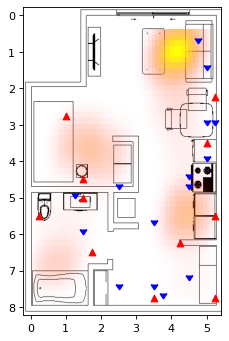

****************************************************************************************************
epsilon: 0.5
****************************************************************************************************
[4.5, 5.0, 0.3, 0.5, 4.5, 0.5, 2.0, 3.0, 2.5, 4.5, 5.0]
[2.5, 3.0, 6.5, 6.5, 6.5, 5.0, 0.5, 2.5, 3.5, 0.5, 5.5]
15
3
Greedy performance: 56.53374230438424 : BO performance: 68.08173806602144


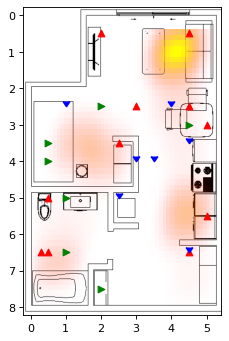

****************************************************************************************************
epsilon: 1
****************************************************************************************************
[4, 5, 1.8, 1, 2, 3, 5, 5, 1, 5, 2, 5, 4]
[4, 7, 5, 3, 5, 7, 6, 3, 6, 1, 4, 4, 7]
19
8
Greedy performance: 65.73422862720226 : BO performance: 68.41162219870792


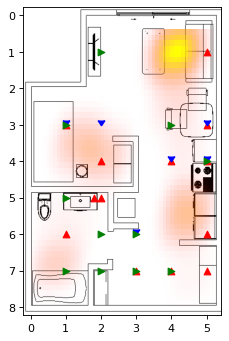

In [9]:
# from turtle import position


for epsilon in [0.25, 0.5, 1]:
    print('*' * 100)
    print('epsilon: ' + str(epsilon))
    print('*' * 100)

    if testbed == 'Testbed1/':
         
        if epsilon == 0.25:
            sensorNumG = -1
            sensorNum = 9
            
            filenumberGA = 0
            filenumber1G = 1
            filenumber1 = 1
            
        
        elif epsilon == 0.5:
            sensorNumG = -1
            sensorNum = 7
            
            filenumberGA = 0
            filenumber1G = 0
            filenumber1 = 1
            
        
        elif epsilon == 1:
            sensorNumG = 15
            sensorNum = 9
            
            filenumberGA = 2
            filenumber1G = 3
            filenumber1 = 0
       
        
    elif testbed == 'Testbed2/':
        
        if epsilon == 0.25:
            sensorNumG = -1
            sensorNum = 11
            
            filenumberGA = 1
            filenumber1G = 1
            filenumber1 = 2
        
        elif epsilon == 0.5:
            sensorNumG = 7
            sensorNum = 11
            
            filenumberGA = 0
            filenumber1G = 3
            filenumber1 = 4
        ####################################    
        elif epsilon == 1:
            sensorNumG = 11
            sensorNum = 13
            
            filenumberGA = 2
            filenumber1G = 3
            filenumber1 = 4
        ####################################
    import matplotlib.pyplot as plt

    if testbed == 'Testbed1/':
        fig, ax = plt.subplots(figsize=(5.0, 5.0), dpi=80)
        

    elif testbed == 'Testbed2/':
        fig, ax = plt.subplots(figsize=(3.2, 5.0), dpi=80)

    
    title, matrix, labels = plot_sensor_locations(results_directory, sensorNum, epsilon, 'BO', filenumber1)
    bo_title = title
    bo_matrix = matrix
    bo_labels = labels

    title, matrix, labels = plot_sensor_locations(results_directory, sensorNum, epsilon, 'GA', filenumberGA)
    ga_title = title
    ga_matrix = matrix
    ga_labels = labels
    
    if sensorNumG != -1:
        title, matrix, labels = plot_sensor_locations(results_directory, sensorNumG, epsilon, 'G', filenumber1G)
        ga_title = title
        ga_matrix = matrix
        ga_labels = labels
    

    # legend = plt.legend(['BO sensor locations', 'GA sensor locations', 'Greedy sensor locations'], ncol = 3, prop={'size': 10}, loc = 'center left', handlelength = 1.5, bbox_to_anchor=(1, 0.5))
    # legend.get_frame().set_alpha(None)
    # legend.get_frame().set_facecolor((0, 0, 0, 0.1))

    print(ga_title + " : " + bo_title)
    plt.show()
    

# Statistics

In [10]:


statistic = pd.DataFrame()
pvalue = pd.DataFrame()

def compare(data, minVal, maxVal = None): 
  data_compare = pd.DataFrame()

  for i1, v1 in pvalue.items():
    for i2, v2 in pvalue.items():
      if maxVal == None:
        if data.loc[i1,i2] < minVal:
          data_compare.loc[i1,i2] = True
        else:
          data_compare.loc[i1,i2] = False

      if maxVal != None:
        if data.loc[i1,i2] < minVal or data.loc[i1,i2] > maxVal:
          data_compare.loc[i1,i2] = True
        else:
          data_compare.loc[i1,i2] = False
  return data_compare


mean_std = pd.DataFrame()
for key1 in accuracies:
    for key2 in accuracies:
        
        # print(np.std(accuracies[key1]))
        # print(np.mean(accuracies[key1]))
        
        mean_std.loc[key1, 'Mean'] = np.mean(accuracies[key1])
        mean_std.loc[key1, 'STD'] = np.std(accuracies[key1])
                                             
        
        t = ttest_ind_from_stats(mean1=np.mean(accuracies[key1]), std1=np.std(accuracies[key1]), nobs1=5,
                                 mean2=np.mean(accuracies[key2]), std2=np.std(accuracies[key2]), nobs2=5)
        
        statistic.loc[key1,key2] = t.statistic
        pvalue.loc[key1,key2] = t.pvalue
        

In [11]:
pvalue

,GA (0.25),BO (5-0.25),BO (7-0.25),BO (9-0.25),BO (11-0.25),BO (13-0.25),GA (0.5),BO (5-0.5),G (5-0.5),BO (7-0.5),...,BO (7-1),G (7-1),BO (9-1),G (9-1),BO (11-1),G (11-1),BO (13-1),G (13-1),BO (15-1),G (15-1)
GA (0.25),1.000000e+00,5.087107e-09,1.464302e-09,4.160364e-10,5.445159e-09,5.952910e-10,7.055569e-01,2.089111e-09,5.985013e-07,1.085311e-09,...,2.720725e-09,2.578899e-07,2.972448e-09,7.224224e-08,3.974805e-09,4.515469e-08,2.597392e-09,3.139377e-07,1.761537e-09,5.689179e-09
BO (5-0.25),5.087107e-09,1.000000e+00,7.745057e-02,3.985928e-04,8.924923e-05,1.946645e-03,1.630147e-10,2.449740e-01,1.999090e-04,1.687691e-01,...,3.348871e-03,1.680742e-04,1.030751e-01,6.830729e-03,7.966983e-01,6.469336e-02,4.700923e-02,2.001860e-06,3.990389e-02,1.950704e-04
BO (7-0.25),1.464302e-09,7.745057e-02,1.000000e+00,1.694696e-03,2.048049e-04,1.806624e-02,1.165332e-11,2.483793e-03,3.466412e-05,4.047742e-01,...,2.764784e-05,2.350334e-05,1.252873e-03,5.958218e-04,1.094224e-01,4.954280e-03,5.337714e-01,2.444170e-07,5.419866e-01,3.422757e-06
BO (9-0.25),4.160364e-10,3.985928e-04,1.694696e-03,1.000000e+00,1.660478e-03,9.867983e-02,4.936334e-13,4.203466e-06,4.462521e-06,1.377947e-04,...,7.762450e-08,2.451926e-06,4.365286e-06,3.185323e-05,4.148929e-04,1.729193e-04,2.000836e-02,2.485013e-08,9.536937e-03,2.816472e-08
BO (11-0.25),5.445159e-09,8.924923e-05,2.048049e-04,1.660478e-03,1.000000e+00,7.650540e-04,1.186735e-09,2.487937e-05,3.757217e-06,1.091144e-04,...,6.135374e-06,3.083759e-06,1.995439e-05,1.602245e-05,9.607281e-05,4.244602e-05,4.513208e-04,3.012446e-07,3.500829e-04,2.457310e-06
BO (13-0.25),5.952910e-10,1.946645e-03,1.806624e-02,9.867983e-02,7.650540e-04,1.000000e+00,1.282684e-12,2.605015e-05,8.183713e-06,1.757124e-03,...,4.402754e-07,4.760033e-06,2.194068e-05,7.519342e-05,2.252122e-03,4.659700e-04,1.360401e-01,4.807330e-08,8.594853e-02,1.157758e-07
GA (0.5),7.055569e-01,1.630147e-10,1.165332e-11,4.936334e-13,1.186735e-09,1.282684e-12,1.000000e+00,6.163609e-12,1.045515e-07,2.504714e-12,...,2.185505e-12,3.102646e-08,1.603133e-11,8.566062e-09,9.896847e-11,5.611617e-09,7.380736e-11,1.067165e-08,2.624164e-11,8.911112e-12
BO (5-0.5),2.089111e-09,2.449740e-01,2.483793e-03,4.203466e-06,2.487937e-05,2.605015e-05,6.163609e-12,1.000000e+00,2.324516e-04,3.402723e-03,...,2.340156e-03,1.774152e-04,4.030738e-01,1.313000e-02,1.373260e-01,1.696028e-01,2.974092e-03,8.059883e-07,1.690694e-03,5.204355e-05
G (5-0.5),5.985013e-07,1.999090e-04,3.466412e-05,4.462521e-06,3.757217e-06,8.183713e-06,1.045515e-07,2.324516e-04,1.000000e+00,3.920783e-05,...,1.455125e-03,7.077576e-01,4.155968e-04,2.352589e-02,1.473168e-04,4.427510e-03,3.739325e-05,4.499856e-02,3.017677e-05,1.410705e-02
BO (7-0.5),1.085311e-09,1.687691e-01,4.047742e-01,1.377947e-04,1.091144e-04,1.757124e-03,2.504714e-12,3.402723e-03,3.920783e-05,1.000000e+00,...,1.352845e-05,2.545149e-05,1.581888e-03,7.990169e-04,2.467057e-01,7.841982e-03,1.949437e-01,1.780374e-07,1.711361e-01,1.525776e-06


In [12]:
compare_pvalue = compare(pvalue, 0.05)

print(compare_pvalue)

             GA (0.25) BO (5-0.25) BO (7-0.25) BO (9-0.25) BO (11-0.25)  \
GA (0.25)        False        True        True        True         True   
BO (5-0.25)       True       False       False        True         True   
BO (7-0.25)       True       False       False        True         True   
BO (9-0.25)       True        True        True       False         True   
BO (11-0.25)      True        True        True        True        False   
BO (13-0.25)      True        True        True       False         True   
GA (0.5)         False        True        True        True         True   
BO (5-0.5)        True       False        True        True         True   
G (5-0.5)         True        True        True        True         True   
BO (7-0.5)        True       False       False        True         True   
G (7-0.5)         True        True        True        True         True   
BO (9-0.5)        True        True       False        True         True   
BO (11-0.5)       True   